In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

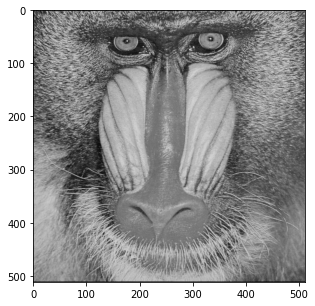

In [ ]:
path = '/content/drive/My Drive/Projects/DIP_Assignments/Test_Images/mandrill.tiff'
im = cv2.imread(path)
plt.figure(figsize=(5,5))
plt.imshow(im,cmap='gray')
plt.show()

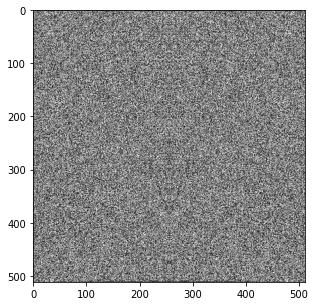

In [ ]:
# FFT
F1 = np.fft.fft2(im)
plt.figure(figsize=(5,5))
F1 = F1[:,:,0]
F1 = np.abs(F1).astype(np.uint8)
plt.imshow(F1,cmap='gray')
plt.show()

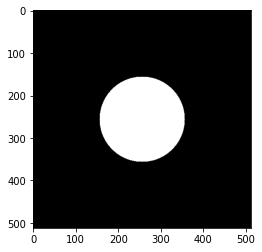

[[ 15.27176666+0.j         -12.558291  +0.j
    6.28537586+0.j         ...  -0.46917106+0.j
    6.28537586+0.j         -12.558291  +0.j        ]
 [-12.57544453+0.00862012j  10.18950905-0.01778167j
   -4.72683943+0.03635165j ...  -0.19445951-0.04547191j
   -4.72683943+0.03635165j  10.18950905-0.01778167j]
 [  6.3394973 -0.02736425j  -4.76303084+0.04058146j
    1.28592377-0.06650344j ...   1.48842124+0.07639903j
    1.28592377-0.06650344j  -4.76303084+0.04058146j]
 ...
 [ -0.55092925-0.05491378j  -0.13368463+0.06483405j
    1.46932588-0.08225978j ...  -2.05433502+0.08201708j
    1.46932588-0.08225978j  -0.13368463+0.06483405j]
 [  6.3394973 +0.02736425j  -4.76303084-0.04058146j
    1.28592377+0.06650344j ...   1.48842124-0.07639903j
    1.28592377+0.06650344j  -4.76303084-0.04058146j]
 [-12.57544453-0.00862012j  10.18950905+0.01778167j
   -4.72683943-0.03635165j ...  -0.19445951+0.04547191j
   -4.72683943-0.03635165j  10.18950905+0.01778167j]]


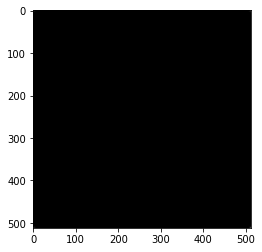

In [ ]:
# Ideal Low Pass Filter
def getdistance(a,b):
  dist = (((a[0]-b[0])**2) + ((a[1]-b[1])**2))**(0.5)
  return dist

def LowPass(Image,D):
  S = Image.shape
  Filter = np.ones(S)
  cx , cy = S[0]//2,S[1]//2
  for i in range(S[0]):
    for j in range(S[0]):
      dist = getdistance([i,j],[cx,cy])
      if dist<=D:
        Filter[i][j] = 1
      else:
        Filter[i][j] = 0
  plt.imshow(Filter,cmap='gray')
  plt.show() 
  return Filter
  
Filter = LowPass(F1,100)
F2 = F1*Filter
F2_Inv = np.fft.ifft2(F2)
print(F2_Inv)
F2_Inv = (np.abs(F2_Inv)).astype(np.uint8)
plt.imshow(F2_Inv,cmap='gray')
plt.show() 




